## **Finding the Data**
Started by looking at possible jobs that I would be interested in applying to. This then led to looking at available data sets to help form a question. 

**Job **

CollegeVine

*Job description*

The average public high school student in the US receives 38 minutes of guidance across 4 years. Here at CollegeVine, we're working to close the guidance gap by providing free, personalized guidance to all students. We've helped thousands of students get into college since 2013, and in 2019 pivoted to an all-digital guidance offering to expand our impact. Transitioning from one-on-one guidance to a 100% software offering is a big challenge, but we've been able to meet it thanks to our unique culture.

You'll be joining a distributed, talented team that's deeply invested in the problems we're trying to solve. We live all around the world, working from our homes, coffee shops, and even a boat! We recruit and hire from varied backgrounds based on our belief that our team's diversity allows us to create better solutions for families.

The model that I will create will be able to predict the chance of a student being accepted into graduate school based on GPA, GRE scores, and other factors. 

https://www.kaggle.com/mohansacharya/graduate-admissions


## **Data Exploration and Cleaning**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['Admission_Predict_Ver1.1.csv']))
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Data cleaning point of interest: There are no missing values

All variables are continuous- this will need regression models

In [ ]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

Target feature: Chance of admit

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


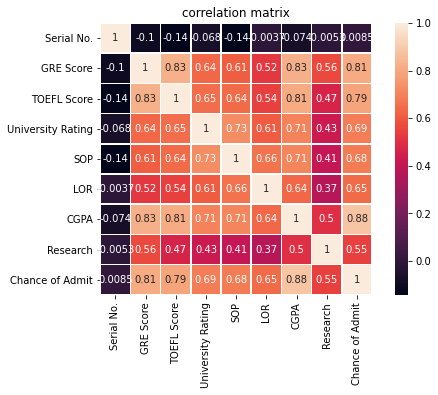

In [ ]:
# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

plt.show()

In [ ]:
correlation = df.corr()
correlation = correlation.sort_values(by=['Chance of Admit'], ascending=False)

correlation[['Chance of Admit']]

,Chance of Admit
Chance of Admit,1.000000
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871
Serial No.,0.008505


Data cleaning point of interest: The Serial No.  has little correlation to the chance of being admitted into graduate school. This column will be dropped

In [ ]:
grad_df=df.drop('Serial No.',axis=1)
grad_df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


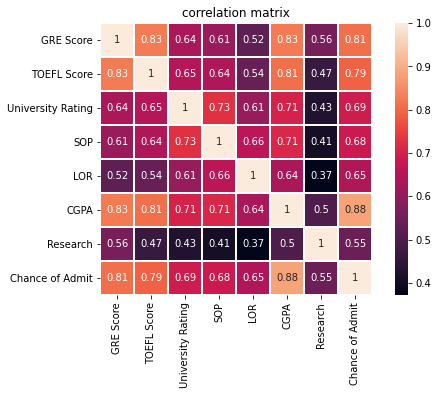

In [ ]:
corrmat2 = grad_df.corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat2, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

plt.show()

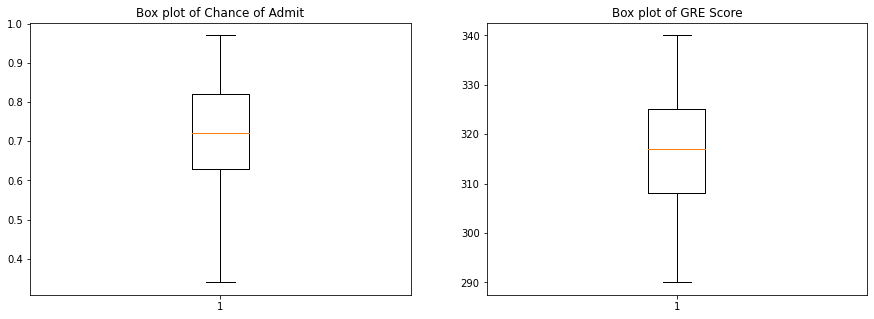

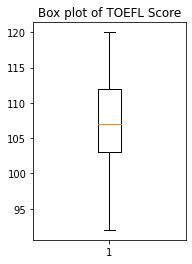

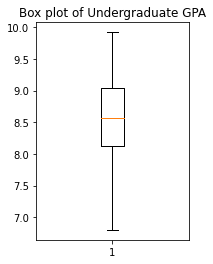

In [ ]:
#Boxplots to look for outliers
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(grad_df["Chance of Admit"], whis = 5)
plt.title("Box plot of Chance of Admit")

plt.subplot(1,2,2)
plt.boxplot(grad_df["GRE Score"], whis = 5)
plt.title("Box plot of GRE Score")
plt.show()

plt.subplot(1,2,2)
plt.boxplot(grad_df["TOEFL Score"], whis = 5)
plt.title("Box plot of TOEFL Score")
plt.show()

plt.subplot(1,2,2)
plt.boxplot(grad_df["CGPA"], whis = 5)
plt.title("Box plot of Undergraduate GPA")
plt.show()

There does not seem to be any outliers in the highest correlated features. 

## **Feature Engineering**

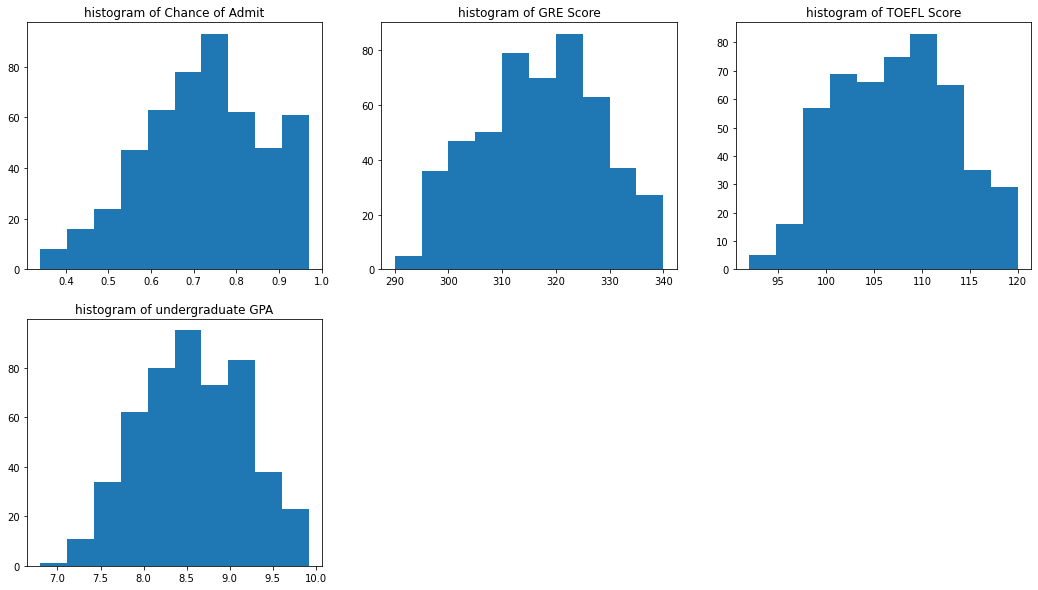

In [ ]:
#Look to see how the data is distributed
from scipy.stats import boxcox

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(grad_df["Chance of Admit"])
plt.title("histogram of Chance of Admit")

plt.subplot(2, 3, 2)
plt.hist(grad_df["GRE Score"])
plt.title("histogram of GRE Score")

plt.subplot(2, 3, 3)
plt.hist(grad_df["TOEFL Score"])
plt.title("histogram of TOEFL Score")

plt.subplot(2, 3, 4)
plt.hist(grad_df["CGPA"])
plt.title("histogram of undergraduate GPA")


plt.show()

In [ ]:
#Check for normality with Jarque Bera
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(grad_df["Chance of Admit"])
norm_stats = normaltest(grad_df["Chance of Admit"])

print("Jarque-Bera test statistics for Chance of Admit is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Chance of Admit is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(grad_df["GRE Score"])
norm_stats = normaltest(grad_df["GRE Score"])

print("Jarque-Bera test statistics for GRE Score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for GRE Score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(grad_df["TOEFL Score"])
norm_stats = normaltest(grad_df["TOEFL Score"])

print("Jarque-Bera test statistics for TOEFL Score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for TOEFL Score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(grad_df["CGPA"])
norm_stats = normaltest(grad_df["CGPA"])

print("Jarque-Bera test statistics for Undergraduate GPA is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Undergraduate GPA  is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for Chance of Admit is 11.413820494720754 and p value is 0.003322923712270165
Normality test statistics for Chance of Admit is 13.843028818381669 and p value is 0.0009863350939806794
Jarque-Bera test statistics for GRE Score is 10.810322162184649 and p value is 0.004493330552292285
Normality test statistics for GRE Score is 26.325841587556983 and p value is 1.9205080572479553e-06
Jarque-Bera test statistics for TOEFL Score is 9.796546651576794 and p value is 0.00745945200090492
Normality test statistics for TOEFL Score is 20.669294853548294 and p value is 3.24877511690625e-05
Jarque-Bera test statistics for Undergraduate GPA is 6.7718914867685625 and p value is 0.03384561793537488
Normality test statistics for Undergraduate GPA  is 12.615430729763098 and p value is 0.0018221915300750521


GRE scores and TOEFL scores are not normally distributed. 

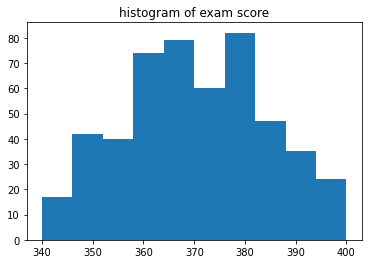

Jarque-Bera test statistics is 10.85364583847121 and p value is 0.004397043396616063
Normality test statistics is 26.7684496663368 and p value is 1.5392352848198558e-06


In [ ]:
import matplotlib.pyplot as plt
exam_score = (grad_df["GRE Score"] +
              grad_df["TOEFL Score"] /2)

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

## Model Creation

*A specified research question that your model addresses*

  What are the chances that a student will be accepted into graduate school? What should a student focus on in order to increase his/her chances of being admitted?

*The practical uses of your model for an audience of interest*

  Students will want to know what to focus on in order to be accepted into graduate school. Will it help to study for the GRE or focus on undergraduate studies to make sure grade point average is high?

In [ ]:
import statsmodels.api as sm

X = grad_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research']] 
Y = grad_df['Chance of Admit']

# We need to manually add a constant

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 22 Aug 2020   Prob (F-statistic):          8.21e-180
Time:                        15:34:59   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.184      0.002       0.001       0.004
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The university rating and SOP (Statement of Purpose) is not significant. 

In [ ]:
#Dropping SOP 
x = grad_df[['GRE Score', 'TOEFL Score','University Rating', 'LOR', 'CGPA', 'Research']] 
y = grad_df['Chance of Admit']

# We need to manually add a constant

x = sm.add_constant(x)

results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sat, 22 Aug 2020   Prob (F-statistic):          4.29e-181
Time:                        17:03:12   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2800      0.103    -12.371      0.000      -1.483      -1.077
GRE Score             0.0019      0.001      3.694      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.236      0.001       0.001       0.005
University Rating     0.0064      0.004      1.820      0.069      -0.001       0.013
LOR                   0.0173      0.004      4.380      0.000       0.010       0.025
CGPA                  0.1190      0.010     12.481      0.000       0.100       0.138
Research              0.0244      0.007      3.691      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Dropping University rating 
x = grad_df[['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research']] 
y = grad_df['Chance of Admit']

# We need to manually add a constant

x = sm.add_constant(x)

results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sat, 22 Aug 2020   Prob (F-statistic):          9.97e-182
Time:                        17:03:46   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3357      0.099    -13.482      0.000      -1.530      -1.141
GRE Score       0.0019      0.001      3.760      0.000       0.001       0.003
TOEFL Score     0.0030      0.001      3.501      0.001       0.001       0.005
LOR             0.0193      0.004      5.092      0.000       0.012       0.027
CGPA            0.1230      0.009     13.221      0.000       0.105       0.141
Research        0.0252      0.007      3.814      0.000       0.012       0.038
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficients are not accurate indicators due to non normalized variables. Variables will be normalized in the models. 

## Training Model

In [ ]:
#Split your data into train and test sets.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(x_train.shape[0]))
print("The number of observations in test set is {}".format(x_test.shape[0]))

The number of observations in training set is 400
The number of observations in test set is 100


In [ ]:
x_train = sm.add_constant(x_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, x_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     398.9
Date:                Sat, 22 Aug 2020   Prob (F-statistic):          1.06e-151
Time:                        15:35:26   Log-Likelihood:                 572.07
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     394   BIC:                            -1108.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3093      0.109    -11.972      

In [ ]:

from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error



## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression(normalize=True, copy_X=True)

lrm.fit(x_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)

print("R-squared of the model in training set is: {}".format(lrm.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



R-squared of the model in training set is: 0.8350438387349877
-----Test set statistics-----
R-squared of the model in test set is: 0.7507609663173056
Mean absolute error of the prediction is: 0.04684032035175128
Mean absolute percentage error of the prediction is: 7.523665497815456


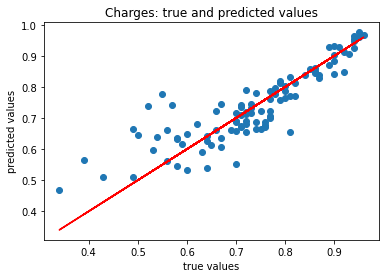

In [ ]:

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [ ]:
#Calculate and print the accuracy of the model on the test data.
lrm_score = lrm.score(x_test, y_test)

print('The accuracy of the linear Regression: {:.3f}'.format(lrm_score))

The accuracy of the linear Regression: 0.751


## Ridge

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)

ridge_cv = RidgeCV(alphas=alphas, cv=5, normalize=True)

ridge_cv.fit(x_train, y_train)


# We are making predictions here
y_preds_train = ridge_cv.predict(x_train)
y_preds_test = ridge_cv.predict(x_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.8349861884899001
-----Test set statistics-----
R-squared of the model in test set is: 0.7497567743543901
Mean absolute error of the prediction is: 0.04695025951497897
Mean absolute percentage error of the prediction is: 7.543416064112694


In [ ]:
#Calculate and print the accuracy of the model on the test data.
ridge_cv_score = ridge_cv.score(x_test, y_test)

print('The accuracy of the ridge model: {:.3f}'.format(ridge_cv_score))

The accuracy of the ridge model: 0.750


Experiments:

## Lasso

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5, normalize=True)

lasso_cv.fit(x_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(x_train)
y_preds_test = lasso_cv.predict(x_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-05
R-squared of the model in training set is: 0.8350406841525166
-----Test set statistics-----
R-squared of the model in test set is: 0.750974821892476
Mean absolute error of the prediction is: 0.046789374185427945
Mean absolute percentage error of the prediction is: 7.519014258130471


In [ ]:
#Calculate and print the accuracy of the model on the test data.
lasso_cv_score = lasso_cv.score(x_test, y_test)

print('The accuracy of the lasso model: {:.3f}'.format(lasso_cv_score))

The accuracy of the lasso model: 0.751


In [ ]:
#Calculate and print the accuracy of the model on the test data.
lasso_cv_score = lasso_cv.score(x_test, y_test)

print('The accuracy of the lasso model: {:.3f}'.format(lasso_cv_score))

The accuracy of the lasso model: 0.751


## Elasticnet

In [ ]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5, normalize=True)

elasticnet_cv.fit(x_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(x_train)
y_preds_test = elasticnet_cv.predict(x_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8347032352886163
-----Test set statistics-----
R-squared of the model in test set is: 0.7496413007140894
Mean absolute error of the prediction is: 0.04680153960455386
Mean absolute percentage error of the prediction is: 7.539001206239723


In [ ]:
#Calculate and print the accuracy of the model on the test data.
elasticnet_cv_score = elasticnet_cv.score(x_test, y_test)

print('The accuracy of the lasso model: {:.3f}'.format(elasticnet_cv_score))

The accuracy of the lasso model: 0.750


## **Conclusion and Reflection**

All models are showing an R squared value of about 0.83 and an accuracy of 75%. 